In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer
from pywaffle import Waffle

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [3]:
from pymongo import MongoClient
client = MongoClient("localhost", 27017) 
db = client.ADTProject
train_collection = db.Train
test_collection = db.Test

In [4]:
train= pd.DataFrame(list(train_collection.find()))
train.drop('_id', inplace=True, axis=1)
test= pd.DataFrame(list(test_collection.find()))
test.drop('_id', inplace=True, axis=1)

In [5]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,NaN,NaN


In [6]:


# Information of the training dataset
print('Training data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('Testing data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))



Training data has 550068 rows and 12 columns
Testing data has 233599 rows and 11 columns


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Purchase                    550068 non-null  int64  
 10  Product_Category_2          376430 non-null  float64
 11  Product_Category_3          166821 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
Product_Category_2               17
Product_Category_3               15
dtype: int64

In [9]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase,Product_Category_2,Product_Category_3
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713,9.842329,12.668243
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394,5.086590,4.125338
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000,2.000000,3.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000,5.000000,9.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000,9.000000,14.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000,18.000000,18.000000


In [10]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
Product_Category_2            173638
Product_Category_3            383247
dtype: int64

In [11]:
#get total count of data including missing data
total = train.isnull().sum().sort_values(ascending=False)

#get percent of missing data relevant to all data
percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


In [12]:


#Imputing nan for Purchase column in test data
test['Purchase']=np.nan
train['Type of data']='Train'
test['Type of data']='Test'
test=test[train.columns]
data=pd.concat([train,test],axis=0)
data.shape



(783667, 13)

In [13]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Product_Category_2,Product_Category_3,Type of data
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0,NaN,NaN,Train
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0,6.0,14.0,Train
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0,NaN,NaN,Train
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0,14.0,NaN,Train
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0,NaN,NaN,Train


In [14]:
data.drop('Product_Category_3',axis=1,inplace=True)

In [15]:
#imputed missing values with random values in the same probability distribution as given feature already had

vc = data.Product_Category_2.value_counts(normalize = True)
miss = data.Product_Category_2.isna()
data.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [16]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                      233599
Product_Category_2                 0
Type of data                       0
dtype: int64

In [17]:
#using the train data part from combined dataset for eda

train = data[data['Type of data']=='Train']

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

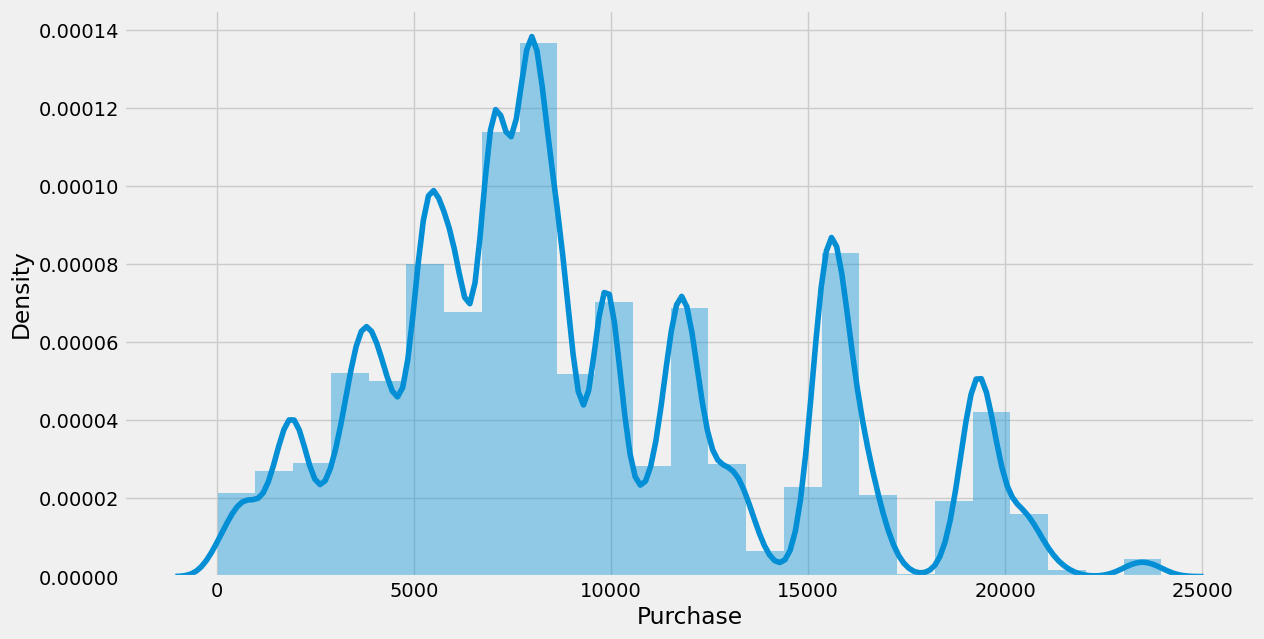

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(train['Purchase'], bins=25 )

Text(0.5, 1.0, 'Purchase violinplot')

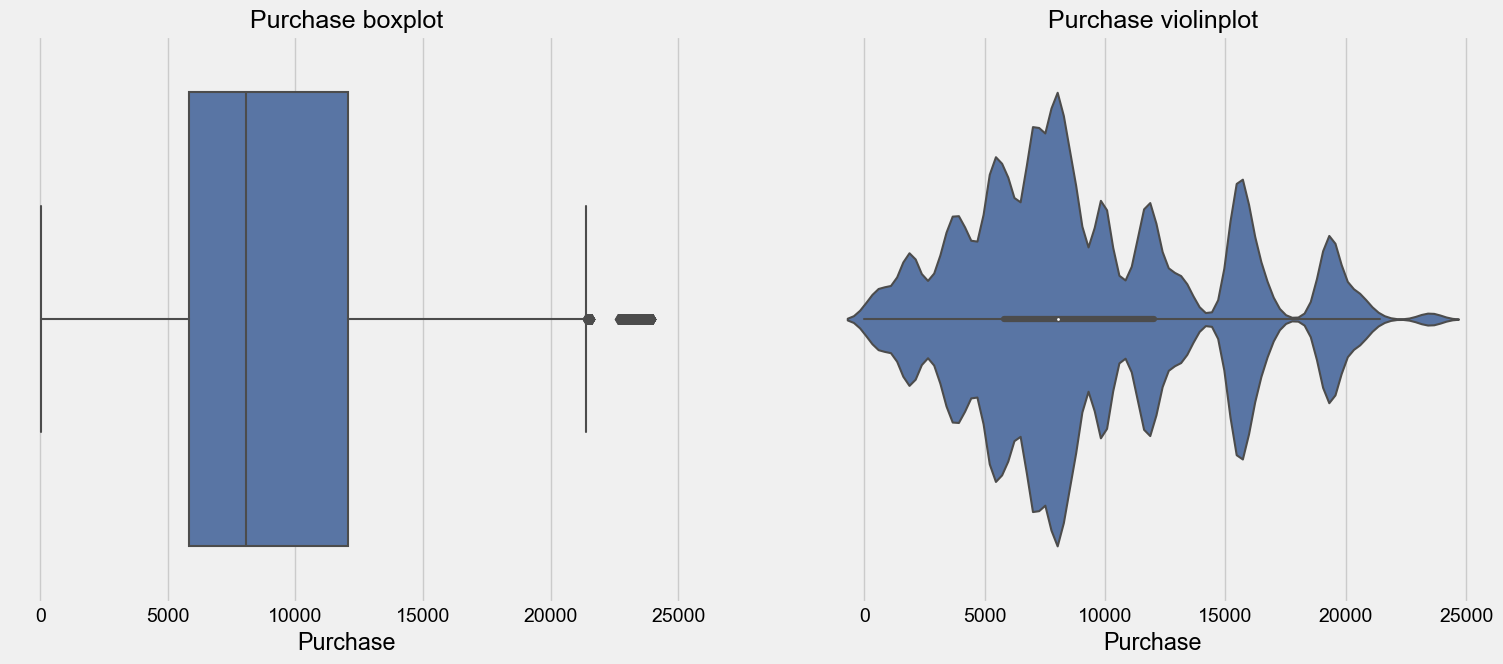

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[17,7])

sns.set(style="whitegrid")

sns.boxplot(x = train["Purchase"],ax=ax[0]).set_title("Purchase boxplot", fontsize=18)

sns.violinplot(train["Purchase"],ax=ax[1]).set_title("Purchase violinplot", fontsize=18)

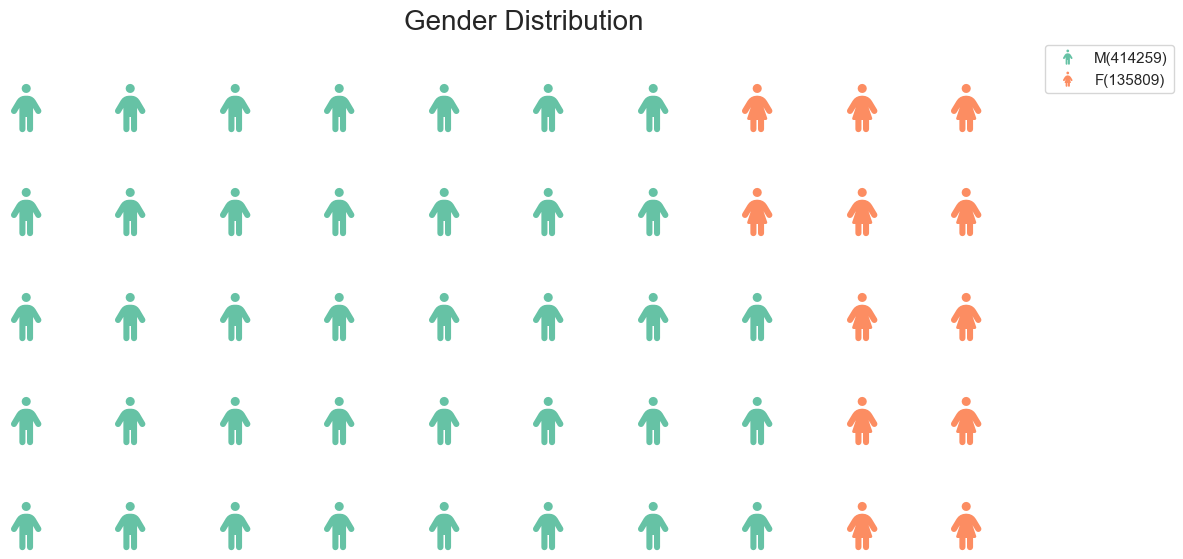

In [20]:


gender = train['Gender'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=10,
    values=gender,
    title={'label': 'Gender Distribution', 'loc': 'center','size':20},
    labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    font_size=35, 
    icons = ['male','female'],
    icon_legend=True,
    figsize=(12, 8)
)



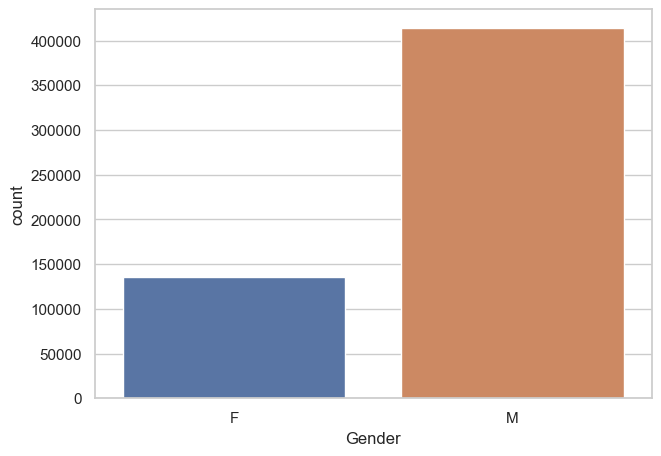

In [21]:


sns.countplot(train['Gender'])
plt.show()



Text(0.5, 1.0, 'Gender VS Purchase')

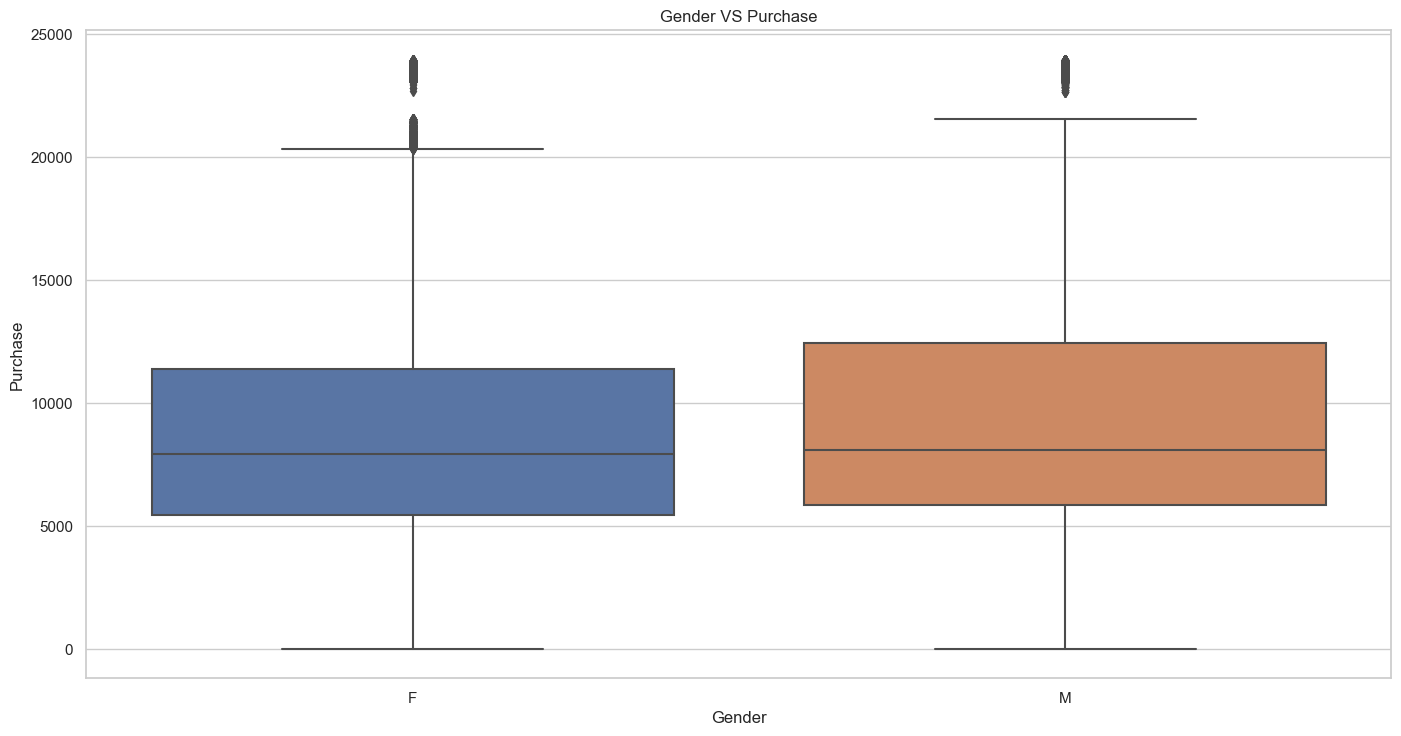

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Gender', y='Purchase', data=train)
plt.title('Gender VS Purchase')

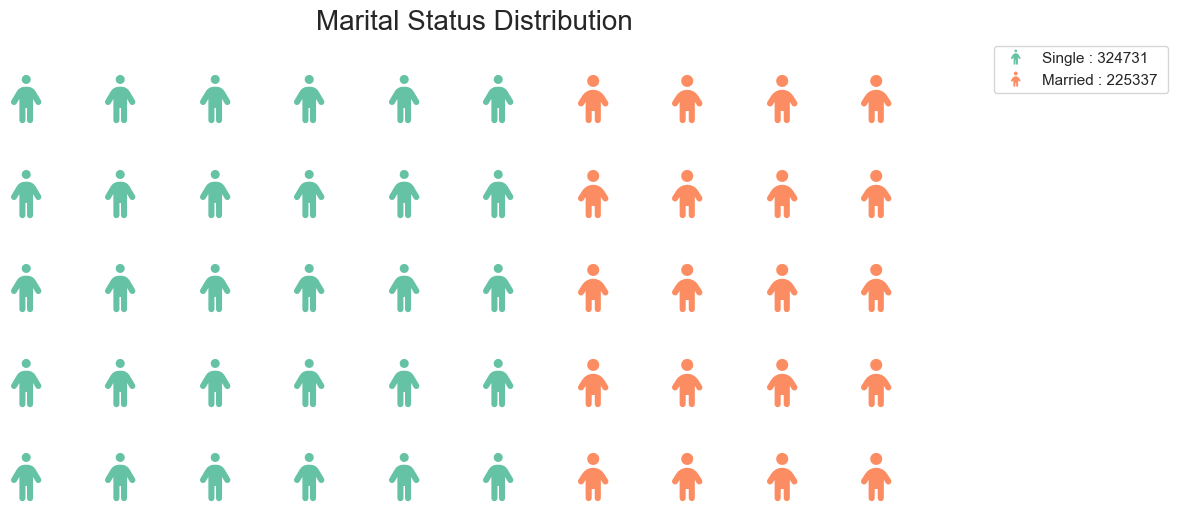

In [23]:
data1=("Single", "Married")
Marital_Status = train['Marital_Status'].value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=10,
    values=Marital_Status,
    title={'label': 'Marital Status Distribution', 'loc': 'center','size':20},
    labels=["{} : {} ".format(a, b) for a, b in zip(data1, Marital_Status) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05,1)},
    font_size=35,
    icons = ['person','child'],
    icon_legend=True,
    figsize=(12, 8)
)

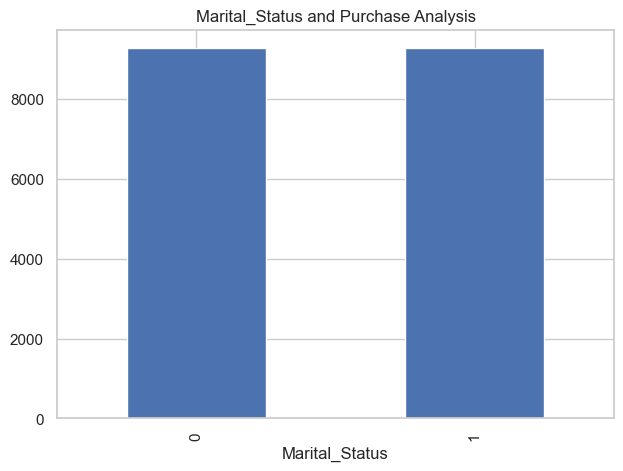

In [24]:
train.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

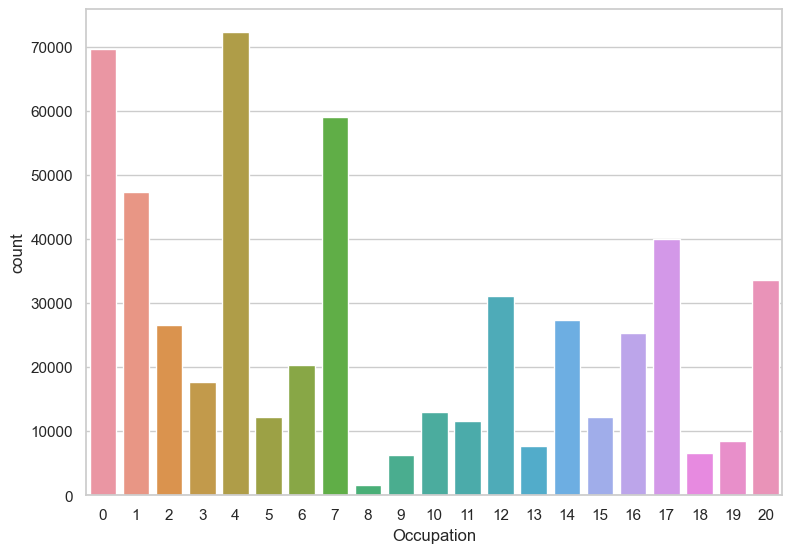

In [25]:


plt.figure(figsize=(8,6))
sns.countplot(x ='Occupation', data = train)
plt.show()



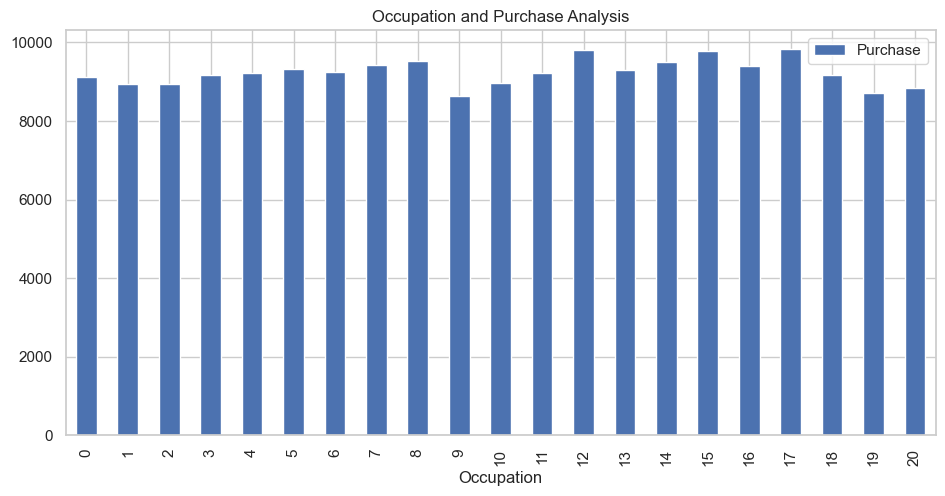

In [26]:


occup = pd.DataFrame(train.groupby("Occupation").mean()["Purchase"])
occup.plot(kind='bar',figsize=(10,5))
plt.title("Occupation and Purchase Analysis")
plt.show()



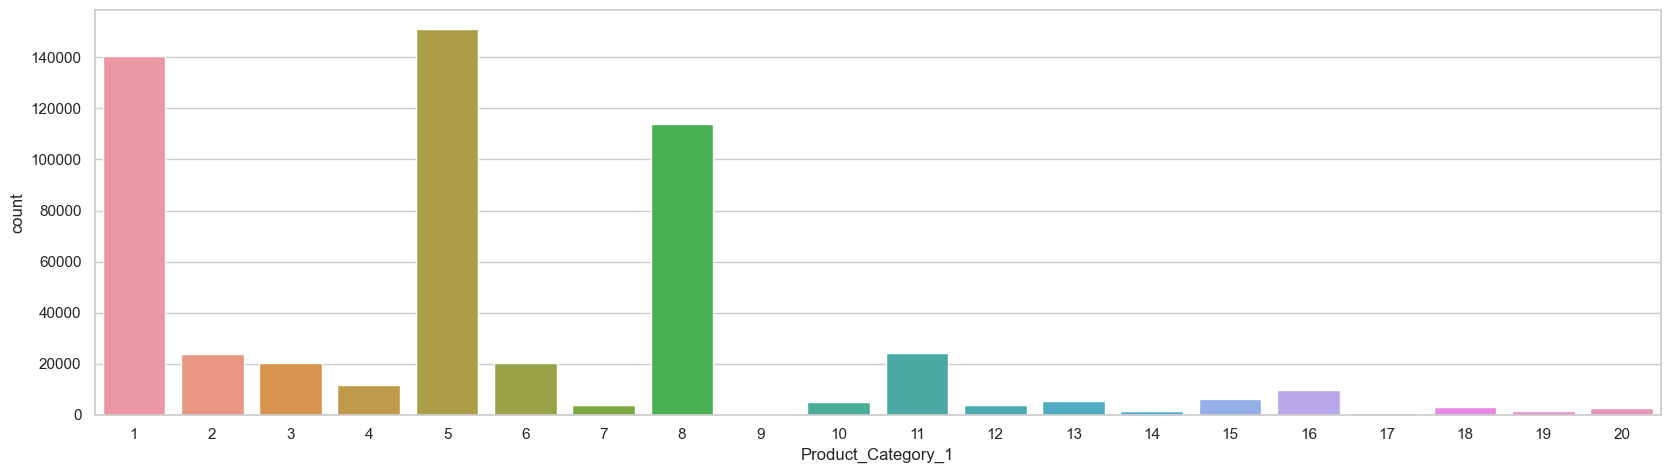

In [27]:
plt.figure(figsize=(18,5))
sns.countplot(train['Product_Category_1'])
plt.show()

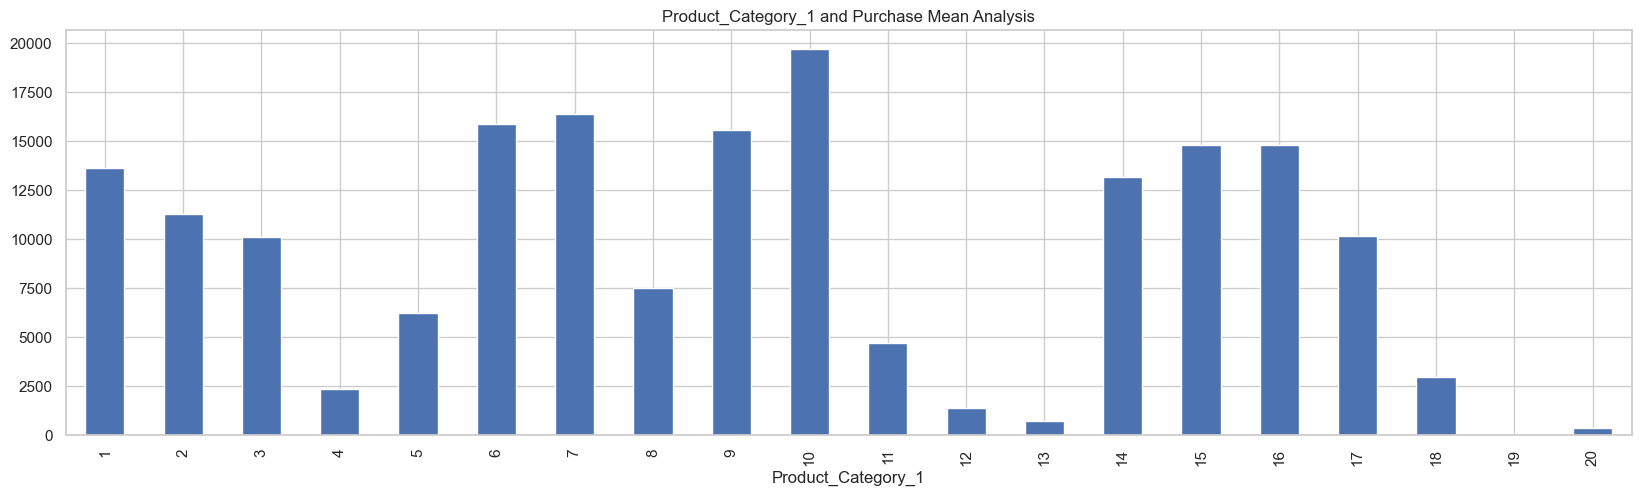

In [28]:
train.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

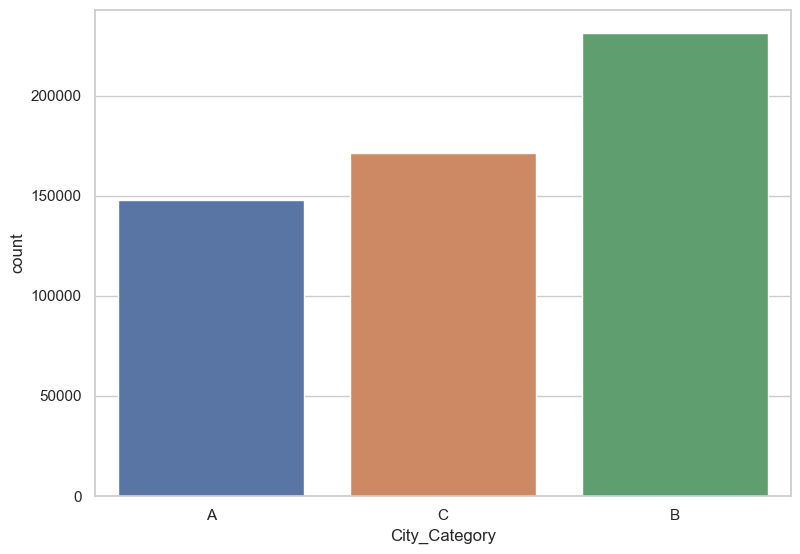

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x ='City_Category', data = train)
plt.show()

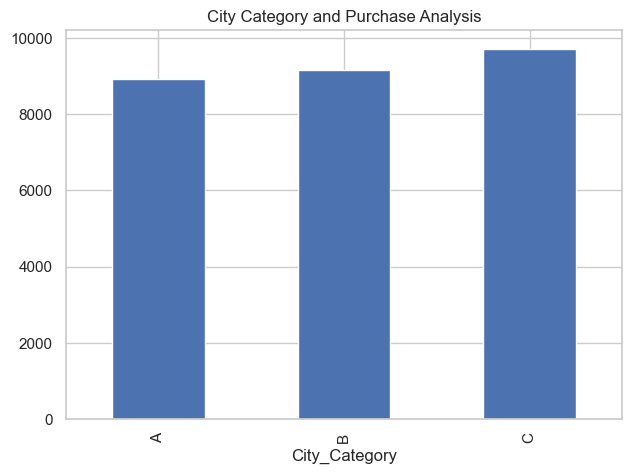

In [30]:
train.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

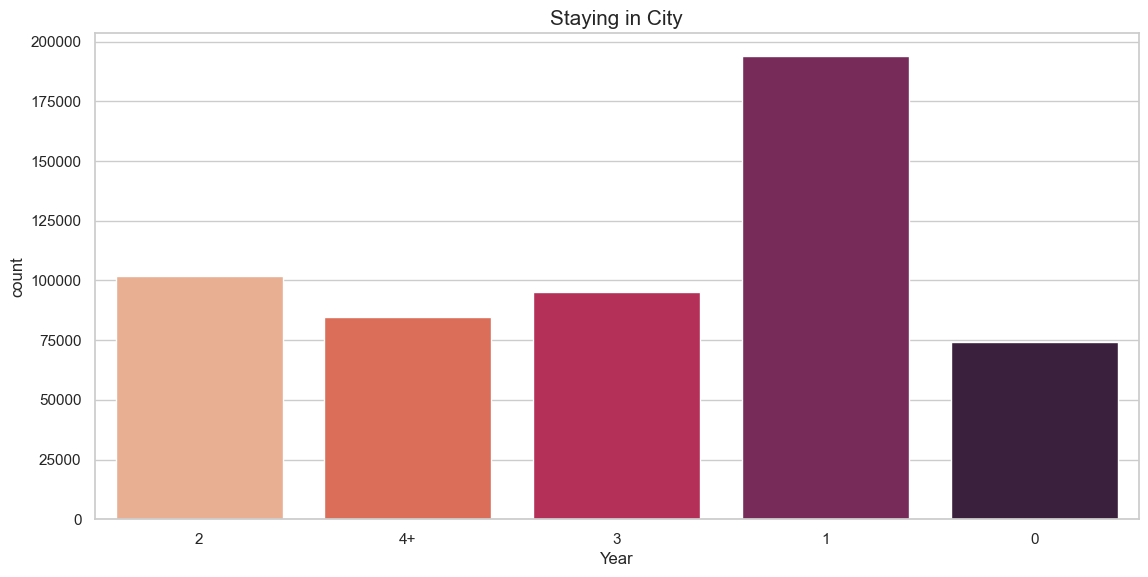

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(train['Stay_In_Current_City_Years'],palette='rocket_r')
plt.title('Staying in City', size=15)
plt.xlabel('Year')
plt.show()

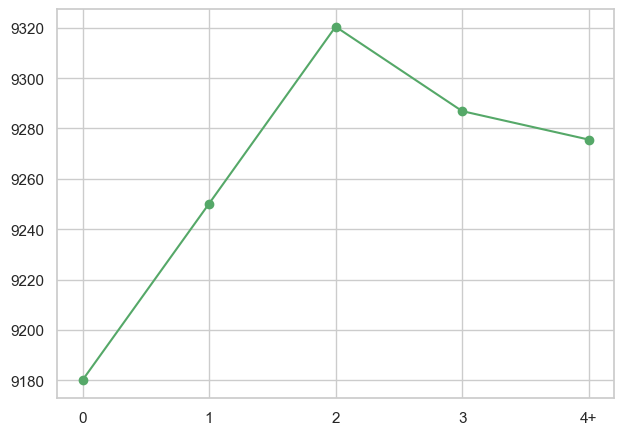

In [32]:
# Avearge amount spend based on the time of stay in the current city

data2 = train.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data2.index,data2.values,marker='o',color='g')
plt.show()

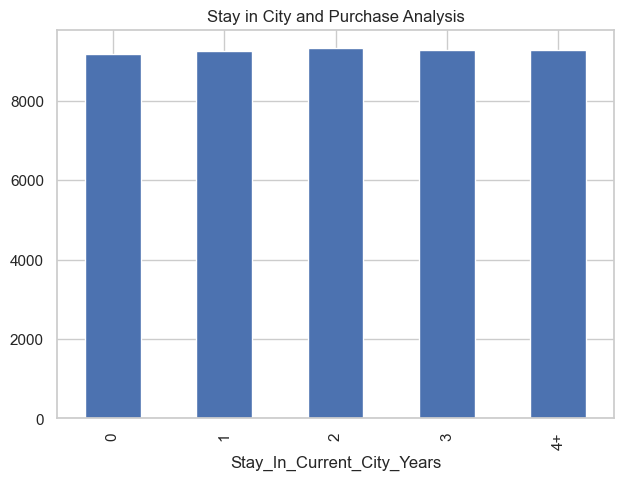

In [33]:
train.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay in City and Purchase Analysis")
plt.show()

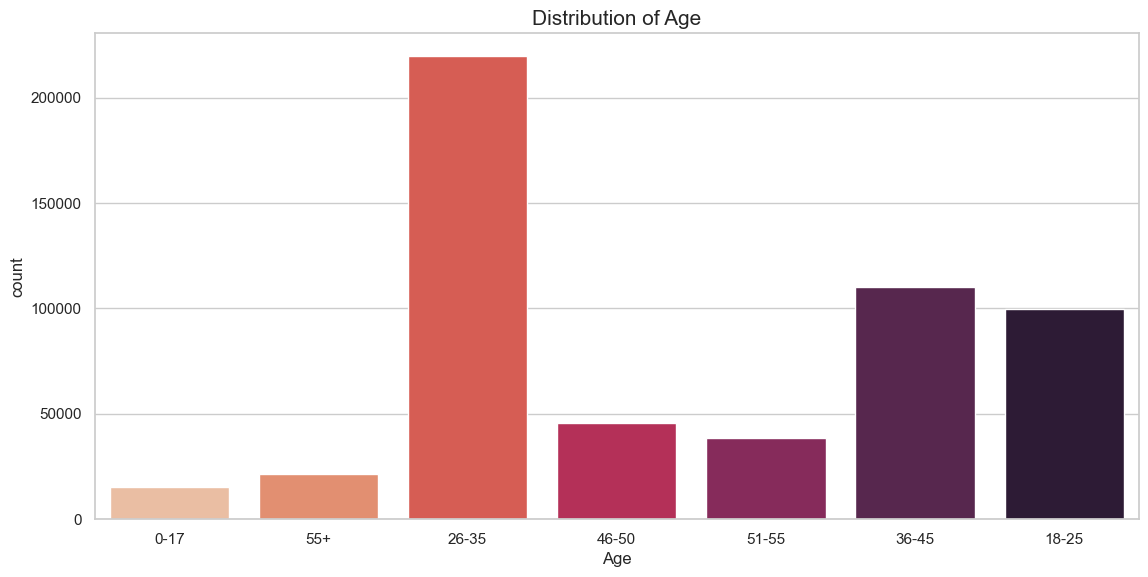

In [34]:


plt.figure(figsize=(12,6))
sns.countplot(train['Age'],palette='rocket_r')
plt.title('Distribution of Age', size=15)
plt.xlabel('Age')
plt.show()



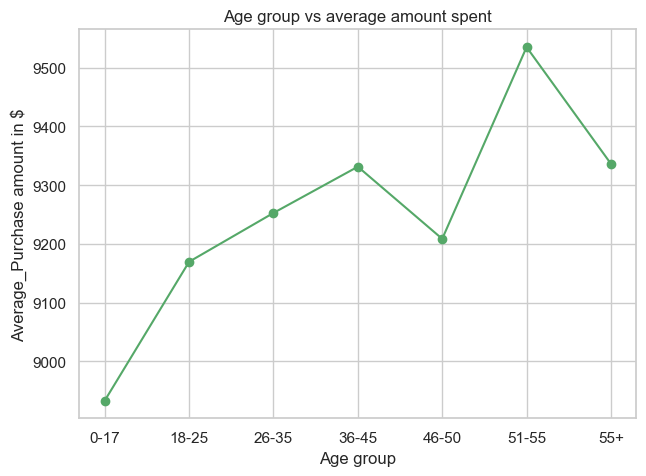

In [35]:


# Avearge amount spend by different age groups

data1 = train.groupby('Age')['Purchase'].mean()
plt.plot(data1.index,data1.values,marker='o',color='g')
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');
plt.show()



In [36]:


data.head(10)



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Product_Category_2,Type of data
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0,8.0,Train
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0,6.0,Train
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0,2.0,Train
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0,14.0,Train
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0,15.0,Train
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227.0,2.0,Train
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215.0,8.0,Train
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854.0,15.0,Train
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686.0,16.0,Train
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871.0,4.0,Train


In [37]:
data.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
233594  1006036  P00118942      F  26-35          15             B   
233595  1006036  P00254642      F  26-35          15             B   
233596  1006036  P00031842      F  26-35          15             B   
233597  1006037  P00124742      F  46-50           1             C   
233598  1006039  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [38]:
# User_ID data preprocess. e.g. 1000002 -> 2

data['User_ID'] = data['User_ID'] - 1000000

# Product_ID preprocess e.g. P00069042 -> 69042

data['Product_ID'] = data['Product_ID'].str.replace('P00', '')

#object to int
data['Product_ID'] = pd.to_numeric(data['Product_ID'],errors='coerce')

In [39]:


#Product Category 2
data.Product_Category_2 = data.Product_Category_2.astype('int64')

#Gender
data['Gender'] = data['Gender'].map({'F':0, 'M':1}).astype(int)



In [40]:
# Modify age column

data['Age'] = data['Age'].map({'0-17': 9,
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
data['Age'].value_counts()

31    313015
42    156724
22    141953
48     65278
53     54784
60     30579
9      21334
Name: Age, dtype: int64

In [41]:
# 4+ to 4
data['Stay_In_Current_City_Years'] =np.where(data['Stay_In_Current_City_Years'].str[:2]=="4+",4,data['Stay_In_Current_City_Years'])

#object to int
data['Stay_In_Current_City_Years'] = pd.to_numeric(data['Stay_In_Current_City_Years'],errors='coerce')

In [42]:
data['City_Category']=data['City_Category'].map({"B":1,"A":2,"C":3})
data['City_Category']=data['City_Category'].astype(int)

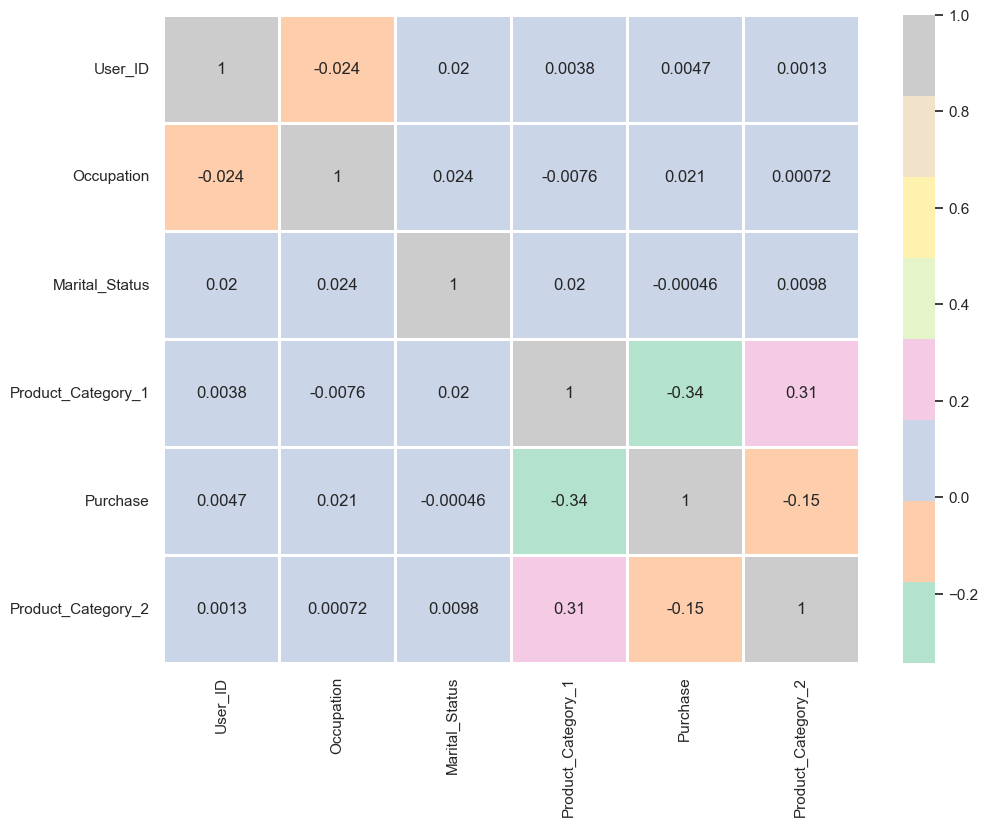

In [43]:

corrmat = train.corr()
corr_features = corrmat.index
plt.figure(figsize=(10,8))
g=sns.heatmap(train[corr_features].corr(),annot=True, linewidth =.9 , cmap="Pastel2")



In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Purchase                    0 non-null       float64
 10  Product_Category_2          161255 non-null  float64
 11  Product_Category_3          71037 non-null   float64
 12  Type of data                233599 non-null  object 
dtypes: float64(3),

In [45]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  Product_Category_2          550068 non-null  float64
 11  Type of data                550068 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 54.6+ MB


In [46]:
output = pd.DataFrame()

output['User_ID'] = test['User_ID']
output['Product_ID'] = test['Product_ID']
output['Purchase'] = np.nan

In [47]:
#splitting the data back into train and test as it was already provided

train = data[data['Type of data']=='Train']
del train['Type of data']
test = data[data['Type of data']=='Test']
test.drop(['Purchase','Type of data'],axis=1,inplace=True)

del data

In [48]:


train.head()



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Product_Category_2
0,1,69042,0,9,10,2,2,0,3,8370.0,8
1,1,248942,0,9,10,2,2,0,1,15200.0,6
2,1,87842,0,9,10,2,2,0,12,1422.0,2
3,1,85442,0,9,10,2,2,0,12,1057.0,14
4,2,285442,1,60,16,3,4,0,8,7969.0,15


In [49]:
#splitting the data into X and y
X = train.drop('Purchase',axis=1)
y = train['Purchase']

#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [50]:
#Linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lr.coef_)
print('\n intercept:', lr.intercept_)

coefficients:
 [ 1.81039162e-02 -3.69829138e-03  5.30762847e+02  1.65535763e+01
  7.35673412e+00  2.41042512e+02  1.60670473e+01 -5.78717463e+01
 -4.11757808e+02 -4.69374790e+01]

 intercept: 11039.09087255875


In [51]:
#Predicting on the test data

y_pred = lr.predict(X_test)

from sklearn import metrics

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.13059274647766383
rmse: 4689.420362446913


In [52]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 2736.8999412622525


In [53]:
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT.fit(X,y)

predict = DT.predict(test)

output['Purchase'] = predict
output.to_csv('Sample_Submission_DT.csv',index=False)

In [54]:


#Fitting the model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 3,max_depth=10,n_estimators=25)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



r2_score: 0.6910211222048528
rmse: 2795.5800401320053


In [55]:
#Random Forest model

rf = RandomForestRegressor(random_state = 3,max_depth=10,n_estimators=25)
rf.fit(X,y)
predict = rf.predict(test)

output['Purchase'] = predict

output.to_csv('Sample_Submission_rf.csv',index=False)

In [56]:
## XGBoost2
from xgboost import XGBRegressor

xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X_train,y_train)

y_pred = xgb2.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7496340213532346
rmse: 2516.4899029339485


In [57]:
xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X,y)
predict = xgb2.predict(test)

output['Purchase'] = predict

output.to_csv('Sample_XGB2.csv')

In [58]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)# Fit the classifier to the data
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.2511610356832754
rmse: 4352.128925934743


In [59]:
knn = KNeighborsClassifier(n_neighbors = 3)# Fit the classifier to the data


knn.fit(X,y)
predict = knn.predict(test)

output['Purchase'] = predict

output.to_csv('Sample_knn.csv')

In [60]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1.head(5)

,Actual,Predicted
41001,15228.0,7842.0
16151,1088.0,379.0
507262,16426.0,12137.0
368698,12042.0,11466.0
353782,8699.0,5153.0


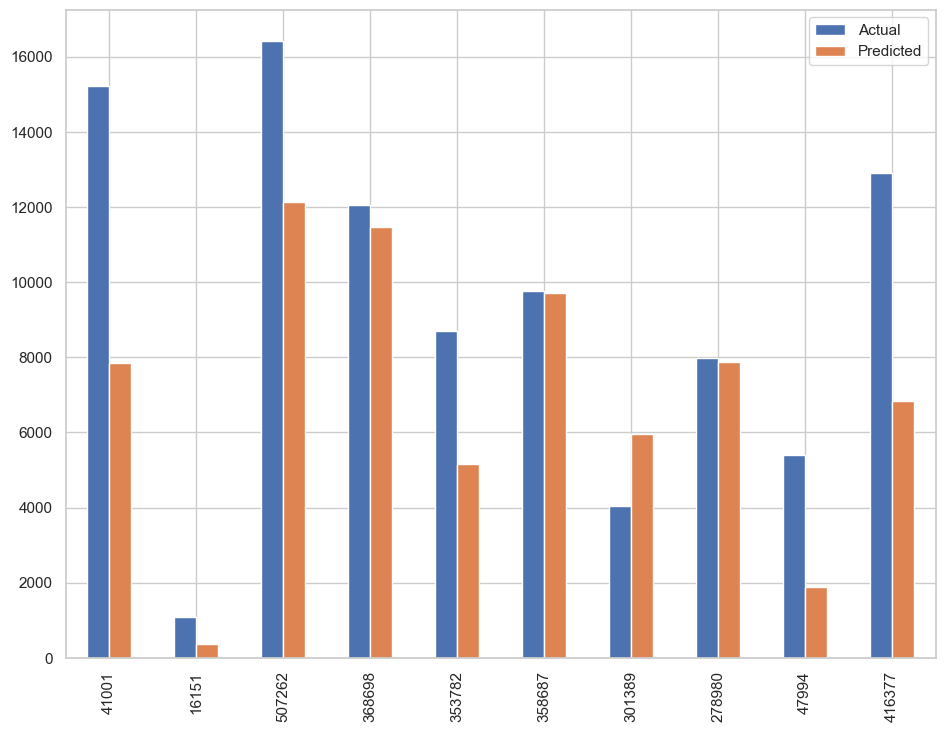

In [61]:


df1.plot(kind='bar',figsize=(10,8))
plt.show()



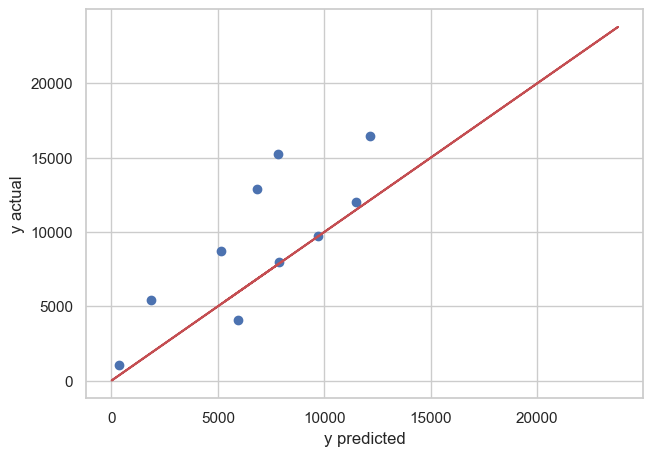

In [62]:
plt.scatter(df1.Predicted,df1.Actual)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()